<a href="https://colab.research.google.com/github/joanjeremiah/K-Means-Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K Means Clustering Project

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

It is very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.

##The Data
We will use a data frame with 777 observations on the following 18 variables.

- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
college_df = pd.read_csv("/content/drive/MyDrive/datasets/College_Data")

In [3]:
college_df.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [4]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
college_df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#EDA
It's time to create some data visualizations!

**Creating a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**



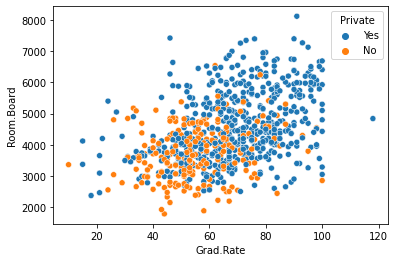

In [7]:
sns.scatterplot(x=college_df["Grad.Rate"],y=college_df["Room.Board"],hue=college_df["Private"])

**Creating a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

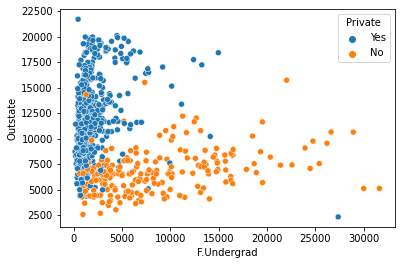

In [8]:
sns.scatterplot(x=college_df["F.Undergrad"],y=college_df["Outstate"],hue=college_df["Private"])

**Creating a stacked histogram showing Out of State Tuition based on the Private column.**

<Figure size 864x432 with 0 Axes>

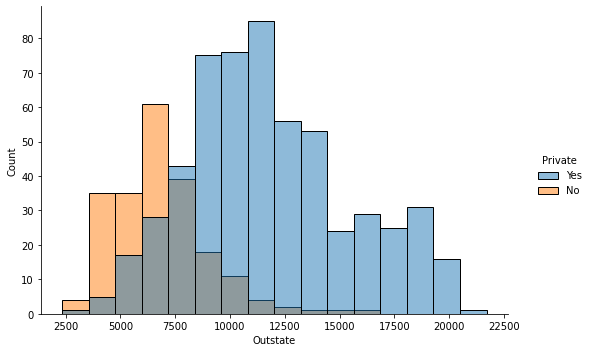

In [20]:
plt.figure(figsize=(12,6))
sns.displot(data=college_df, x='Outstate', hue='Private', fill=True, height=5, aspect=1.5)

**Creating a similar histogram for the Grad.Rate column.**

<Figure size 864x432 with 0 Axes>

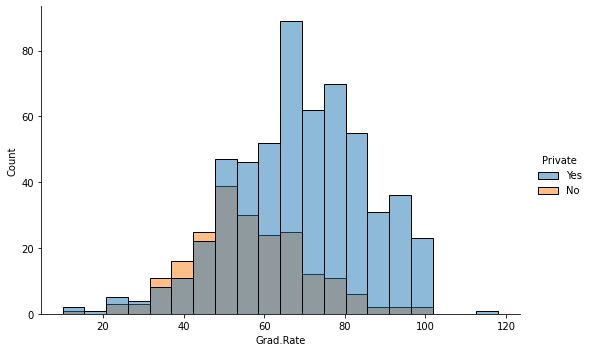

In [21]:
plt.figure(figsize=(12,6))
sns.displot(data=college_df, x='Grad.Rate', hue='Private', fill=True, height=5, aspect=1.5)

In [24]:
college_df[college_df["Grad.Rate"] > 100]["Grad.Rate"] = 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#K Means Cluster Creation

**Import KMeans from SciKit Learn.**

In [25]:
from sklearn.cluster import KMeans

In [32]:
kMeans = KMeans(n_clusters = 2)

**Fitting the model to all the data except for the Private label.**

In [34]:
kMeans.fit(college_df.drop(["Unnamed: 0","Private"],axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Centres of clusters**

In [35]:
kMeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

#Evaluation
There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [38]:
def converter(private):
  if(private == 'True'):
    return 1
  else:
    return 0

In [41]:
college_df["Clusters"] = college_df["Private"].apply(converter)

In [42]:
college_df.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Clusters
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0


In [44]:
kMeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Creating a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(college_df["Clusters"],kMeans.labels_))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       777
           1       0.00      0.00      0.00         0

    accuracy                           0.86       777
   macro avg       0.50      0.43      0.46       777
weighted avg       1.00      0.86      0.93       777



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print(confusion_matrix(college_df["Clusters"],kMeans.labels_))

[[669 108]
 [  0   0]]
